In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{wasysym}')


import scipy.integrate as si
import scipy as sp
import scipy.optimize as so
import scipy.interpolate as st #sinterp

Abs=np.abs
Log=np.log
Log10=np.log10
Pi=np.pi
ArcTanh=np.arctanh
Sqrt=np.sqrt
Exp=np.exp
Cos=np.cos
Sin=np.sin
Arg=np.angle
HeavisideTheta=lambda x: np.heaviside(x,0)
def Plot(fun,xminmax,n=100):
    xlist=np.linspace(xminmax[0],xminmax[1],n)
    ylist=[fun(x) for x in xlist]
    plt.plot(xlist,ylist)
    

# solar models

## plot data in data/B16/*.dat 

Files in data/B16 are are downloaed from http://www.ice.cat/personal/aldos/Solar_Data.html

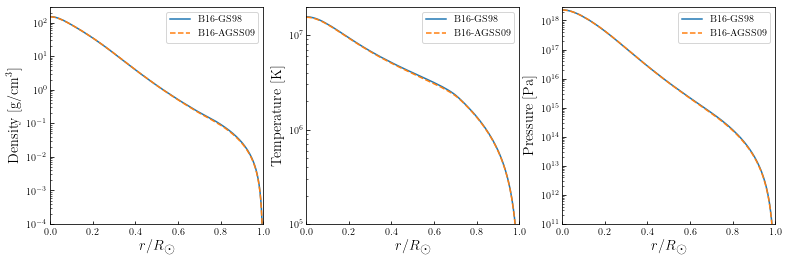

In [17]:
head="Mass     Radius     Temp      Rho       Pres       Lumi      H1       He4      He3       C12       C13       N14        N15      O16       O17       O18        Ne        Na       Mg         Al        Si         P       S         Cl        Ar        K         Ca        Sc         Ti        V         Cr        Mn        Fe        Co        Ni" 
heads=head.split()
head_dict={}
for i, head in enumerate(heads):
    head_dict[head]=i
    
    
    
fig, axs=plt.subplots(ncols=3,figsize=[13,4],sharey=False)
for name in ["gs98","agss09"]:
    if name=="agss09":   ls="--";label="B16-AGSS09";
    else: ls="-"; label="B16-GS98"
    data=np.loadtxt("data/B16/struct_b16_"+name+".dat")
    ax=axs[0]
    ax.plot(data[:,head_dict["Radius"]],data[:,head_dict["Rho"]],ls=ls,label=label)
    ax=axs[1]
    ax.plot(data[:,head_dict["Radius"]],data[:,head_dict["Temp"]],ls=ls,label=label)
    ax=axs[2]
    ax.plot(data[:,head_dict["Radius"]],data[:,head_dict["Pres"]]*10,ls=ls,label=label)



ax=axs[0]


ax=axs[0]
ax.set_ylabel(r"",fontsize=12*1.2)
    
for i,ax in enumerate(axs):
    ax.set_xlim(0.0,1)
    ax.set_ylim([1e-4,1e5,1e11][i],[300,2e7,3e18][i])
    ax.set_yscale("log")
#     ax.text(s=["pp-chain neutrinos","CNO-cycle neutrinos"][i],x=0.07,y=20.5,fontsize=12*1.2)

    ax.legend()
    ax.set_xlabel(r"$r/R_{\astrosun}$ ",fontsize=12*1.2)
    ax.set_ylabel([r"Density [g/cm$^3$]",r"Temperature [K]",r"Pressure [Pa]"][i],fontsize=12*1.2)

    ax.tick_params(which='both', direction='in')
# plt.savefig("../figs/solar_model.pdf",bbox_inches='tight')
plt.show()

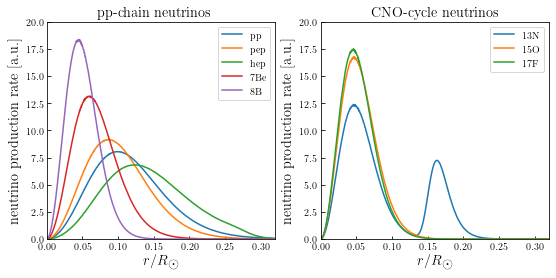

In [18]:
# 5) Fraction of pp neutrinos produced in the zone
# 6) Fraction of pep neutrinos produced in the zone
# 7) Fraction of hep neutrinos produced in the zone
# 8) Fraction of beryllium 7 neutrinos produced in the zone
# 9) Fraction of boron 8 neutrinos produced in the zone
# 10) Fraction of nitrogen 13 neutrinos produced in the zone
# 11) Fraction of oxygen 15 neutrinos produced in the zone
# 12) Fraction of florine 17 neutrinos produced in the zone
fig, axs=plt.subplots(ncols=2,figsize=[9,4],sharey=False)
data=np.loadtxt("data/B16/nudistr_b16_gs98.dat")
ax=axs[0]
for i in range(5,10):
    ax.plot(data[:,0],data[:,i-1],label=["pp","pep","hep","7Be","8B","13N","15O","17F"][i-5])


ax=axs[1]
for i in range(10,13):
    plt.plot(data[:,0],data[:,i-1],label=["pp","pep","hep","7Be","8B","13N","15O","17F"][i-5])


for i,ax in enumerate(axs):
    ax.set_xlim(0.0,0.32)
    ax.set_ylim(0,20)
    ax.text(s=["pp-chain neutrinos","CNO-cycle neutrinos"][i],x=0.07,y=20.5,fontsize=12*1.2)

    ax.legend()
    ax.set_xlabel(r"$r/R_{\astrosun}$ ",fontsize=12*1.2)
    if i>=0:
        ax.set_ylabel(r"neutrino production rate [a.u.]",fontsize=12*1.2)
    ax.tick_params(which='both', direction='in')
# plt.savefig("../figs/r_prod.pdf",bbox_inches='tight')
plt.show()

use Bahcall's spectral shape (see data/Bahcall/*.csv)

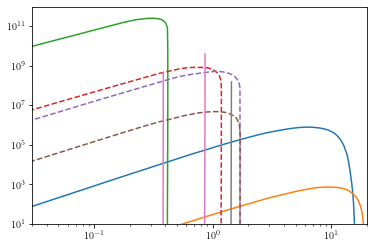

In [19]:
for name in ["8B","hep","pp","13N","15O","17F","7Be","pep"]:
    
    data=np.loadtxt("data/Bahcall/"+name+".csv",delimiter=",")
    data=10**data
    if name in ["13N","15O","17F"]:
        plt.plot(data[:,0],data[:,1],ls="--")
    else:
        plt.plot(data[:,0],data[:,1])
plt.loglog()
plt.xlim(3e-2,20)
plt.ylim(1e1,1e12)
# plt.savefig("../figs/nu_spectrum_Bahcall.pdf",bbox_inches='tight')
plt.show()

The following flux is taken from Bahcall's textbook

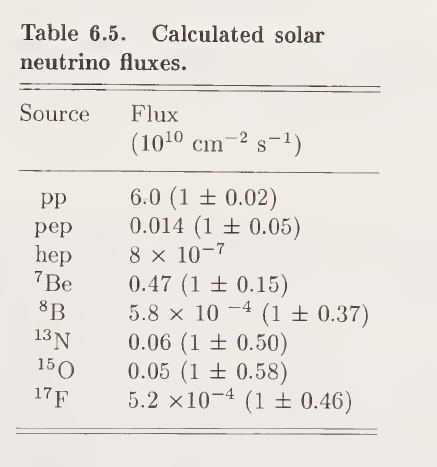

The following flux is taken from the B16 paper [https://arxiv.org/abs/1611.09867]

 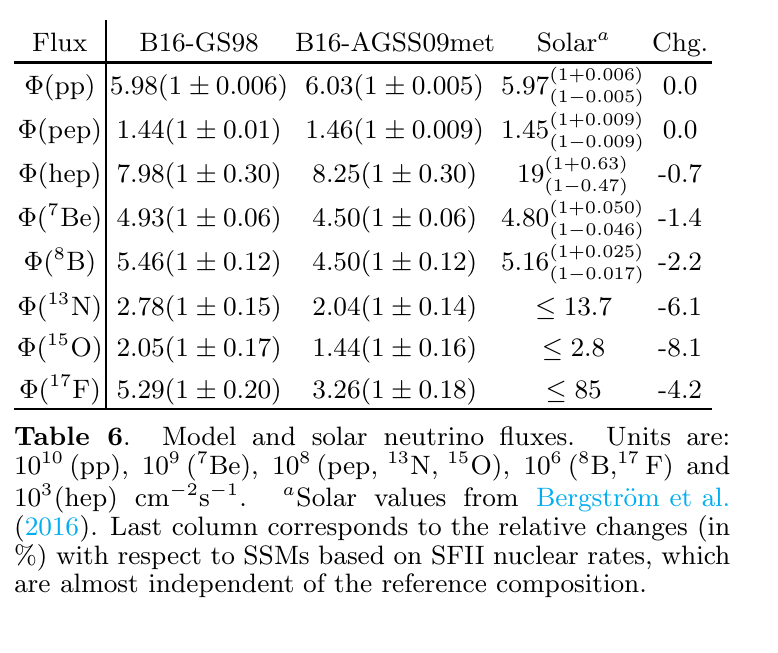

In [12]:
GS98={"pp":5.98e10,  
"pep":1.44e8,  
"hep":7.98e3,      
"7Be":4.93e9,  
"8B":5.46e6,  
"13N":2.78e8,
"15O":2.05e8,
"17F":5.29e6}
Bahcall={"pp":6e10,  
"pep":0.014e10, 
 "hep":8e3,
 "7Be":0.47e10, 
"8B":5.8e6,
"13N":0.06e10,  
"15O":0.05e10,  
"17F":5.2e6,
}

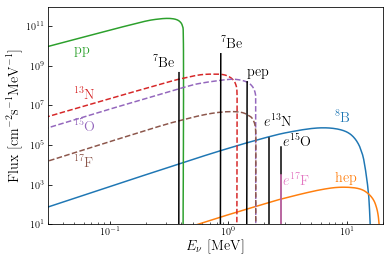

In [13]:
icol=0;
for name in ["8B","hep","pp","13N","15O","17F","7Be","pep"]:
    data=np.loadtxt("data/Bahcall/"+name+".csv",delimiter=",")
    data=10**data
    data[:,1]=data[:,1]*GS98[name]/Bahcall[name]
    if name in ["7Be","pep"]:
        col="k"
    else:
        col="C"+str(icol)
        icol=icol+1

    if name in ["13N","15O","17F"]:
        plt.plot(data[:,0],data[:,1],ls="--",color=col)
    else:
        plt.plot(data[:,0],data[:,1],color=col)
    if name in ["pp","13N","15O","17F"]:  x,y=0.05, data[0,1]*2
    if name in ["8B","hep"]:            x,y=8, max(data[:,1])*2
    if name in ["7Be","pep"]:            x,y=data[-1,0], max(data[:,1])*2
    if name =="13N": y=y*10
    plt.text(s={"8B":"${}^8$B","hep":"hep","pp":"pp","13N":"${}^{13}$N","15O":"${}^{15}$O",
                "17F":"${}^{17}$F","7Be":"${}^7$Be","pep":"pep"}[name],x=x,y=y,fontsize=12*1.2,color=col)
    if name == "7Be":
        plt.text(s="${}^7$Be",x=0.23,y=1e9,fontsize=12*1.2,color=col)
col="k"
plt.plot([2.220]*2,[1e-1,GS98["13N"]*7.9e-4],color=col) #energy data from hep-ph/0309266v3, 7.9e-4 from our review
plt.plot([2.754]*2,[1e-1,GS98["15O"]*3.9e-4],color=col)
plt.plot([2.761]*2,[1e-1,GS98["17F"]*5.8e-4],color="C6")
plt.text(s="$e{}^{13}$N",x=2.0,y=1e6,fontsize=12*1.2,color=col)
plt.text(s="$e{}^{15}$O",x=2.9,y=1e5,fontsize=12*1.2,color=col)
plt.text(s="$e{}^{17}$F",x=2.9,y=1e3,fontsize=12*1.2,color="C6")
plt.loglog()
plt.xlim(3e-2,20)
plt.ylim(1e1,1e12)

plt.xlabel(r"$E_{\nu}$  [MeV]",fontsize=12*1.2)
plt.ylabel(r"Flux [cm$^{-2}$s$^{-1}$MeV$^{-1}$]",fontsize=12*1.2)
plt.tick_params(which='both', direction='in')
    
# plt.savefig("../figs/nu_spectrum.pdf",bbox_inches='tight')
plt.show()

the following code export the flux to a data file when 

np.save('flux-B16-GS98.npy',flux)

is uncommented 

In [15]:
flux={}
for name in ["8B","hep","pp","13N","15O","17F","7Be","pep"]:
    data=np.loadtxt("data/Bahcall/"+name+".csv",delimiter=",")
    data=10**data
    data[:,1]=data[:,1]*GS98[name]/Bahcall[name]
    if name == "7Be":
        flux[name+"1"]=np.copy(data[0:2,:])
        flux[name+"2"]=np.copy(data[2:4,:])
    else:
        flux[name]=np.copy(data)


flux["e13N"]=np.transpose([[2.220]*2,[1e-1,GS98["13N"]*7.9e-4]])
flux["e15O"]=np.transpose([[2.754]*2,[1e-1,GS98["15O"]*3.9e-4]])
flux["e17F"]=np.transpose([[2.761]*2,[1e-1,GS98["17F"]*5.8e-4]])
# np.save('flux-B16-GS98.npy',flux)